In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
basedir=""

In [2]:
net_df = pd.read_csv(basedir+"Sweden/Sweden_Type_of_Power_Net.csv")

In [3]:
net_df
sweden_net = net_df.T
sweden_net.columns = sweden_net.iloc[0]
final_net = sweden_net.drop(["type of power plants"])

In [4]:
final_net.rename(columns = {"type of power plants" : "year"})


type of power plants,sum of supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,gas-turbines for reserve and others,import
Net 1986,135520,60134,-243,66884,3443,2807,0,0,617,43,1835
Net 1987,143695,70950,-254,64341,3212,2761,0,0,446,65,2174
Net 1988,146174,69015,-252,66274,2775,2871,0,0,377,50,5064
Net 1989,150902,70914,-75,62687,2241,2813,0,0,200,70,12053
Net 1990,154622,71676,-227,65225,2221,2582,0,0,204,31,12909
Net 1991,148656,62499,-183,73484,3433,2905,0,0,292,50,6225
Net 1992,150626,73524,-227,60774,4012,3087,0,0,524,84,8847
Net 1993,149191,73809,-242,58761,4781,3533,52,0,389,131,7979
Net 1994,145069,58375,-151,70086,5165,3832,75,0,872,136,6680
Net 1995,151847,67247,-25,66978,5489,3844,105,0,401,89,7720


In [150]:
gross_df = pd.read_csv(basedir+"Sweden\Sweden_Type_of_Power_Gross.csv")

In [151]:
gross_df.set_index("type of power plants")
sweden_gross = gross_df.T
sweden_gross.columns = sweden_gross.iloc[0]
final_gross = sweden_gross.drop(["type of power plants"])

In [152]:
# final_gross

In [153]:
Own_df = pd.read_csv(basedir+"Sweden\Sweden_Type_of_Power_Own_Use.csv")

In [154]:
Own_df.set_index("type of power plants")
sweden_own = Own_df.T
sweden_own.columns = sweden_own.iloc[0]
final_own = sweden_own.drop(["type of power plants"])

In [155]:
# final_own

In [156]:
# final_own.astype('float64').dtypes
# final_net.astype('float64').dtypes
# final_gross.astype('float64').dtypes

In [157]:
final_own = final_own.reset_index().rename(columns={"index":"Year"})
final_net = final_net.reset_index().rename(columns={"index":"Year"})
final_gross = final_gross.reset_index().rename(columns={"index":"Year"})

In [185]:
final_own = final_own.rename(columns={"sum of supply": "total_supply"})
final_net = final_net.rename(columns={"sum of supply": "total_supply"})
final_gross = final_gross.rename(columns={"sum of supply": "total_supply"})

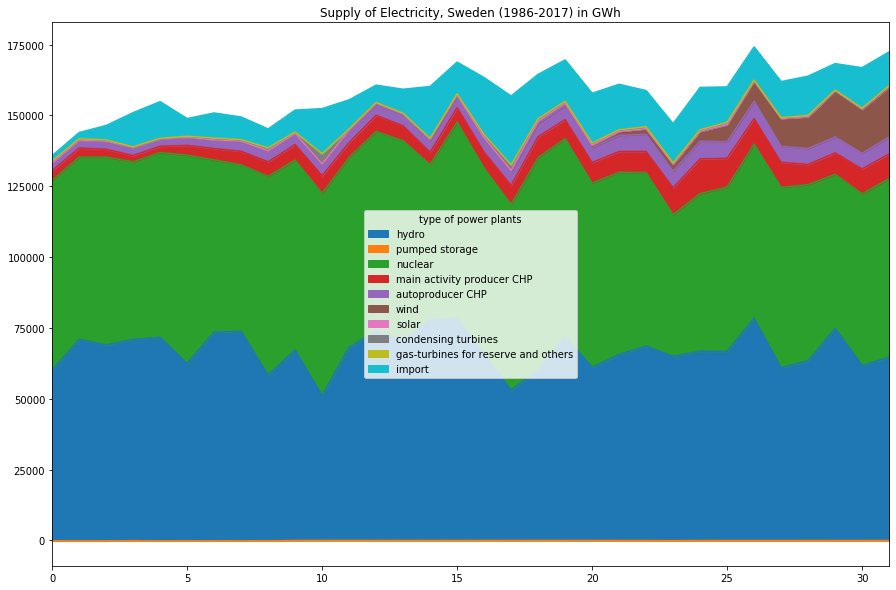

In [186]:
final_net.drop("total_supply", axis=1).plot.area(figsize = [15,10], title = "Supply of Electricity, Sweden (1986-2017) in GWh")
plt.show()

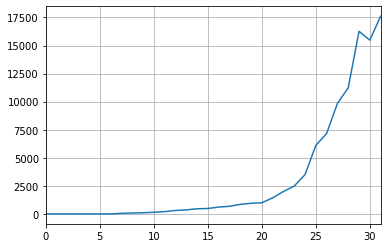

In [117]:
final_net["wind"].plot(grid=True)
plt.show()

In [160]:
new_df = final_gross.total_supply.values.reshape(-1, 1).astype("float64")
# new_df
n_df = final_gross.hydro.values.reshape(-1, 1).astype("float64")
# new_df

In [161]:
# final_net.to_csv("sweden_net.csv")
# final_gross.to_csv("sweden_gross.csv")
# final_own.to_csv("sweden_own.csv")

In [162]:
X = final_gross.drop("total_supply", axis=1)
y = new_df.astype("float64")
print(X.shape, y.shape)

(32, 11) (32, 1)


In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=89)

In [164]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [165]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9999993072644444
Testing Score: 0.9999985254626007


Text(0.5, 1.0, 'Residual Plot')

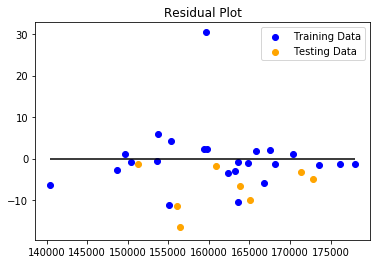

In [166]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

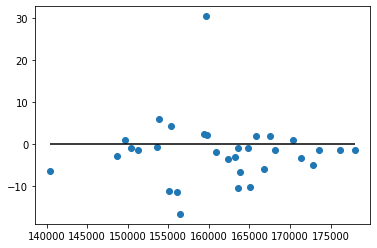

In [144]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [145]:
# predictions

In [146]:
# y

Shape:  (32, 1) (32, 1)
Weight coefficients:  [[0.34878042]]
y-axis intercept:  [137875.95751622]
Min X Value: [[51740.]]
Max X Value: [[79061.]]
True output: [140486.]
Predicted output: [159128.19502928]
Prediction Error: [18642.19502928]


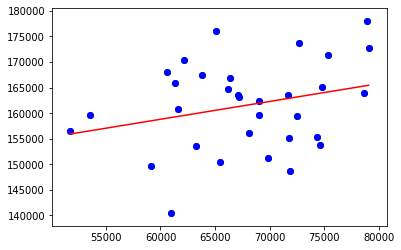

In [167]:
X = n_df.astype("float64")
y = new_df.astype("float64")

print("Shape: ", X.shape, y.shape)
X
plt.scatter(X, y)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [168]:
merge_df=final_gross.iloc[24:]

In [169]:
price_df = pd.read_csv(basedir+"Sweden\sweden_electricty_price_10-18.csv")

In [170]:
price_df

,"Electricity prices for households in Sweden 2010-2018, annually",Unnamed: 1
0,Electricity prices for households in Sweden fr...,NaN
1,2010,18.99
2,2011,20.68
3,2012,20.55
4,2013,20.74
5,2014,19.17
6,2015,18.63
7,2016,19.28
8,2017,19.65
9,2018,19.41


In [171]:
price_df = price_df.drop([0])

In [172]:
price_df = price_df.rename(columns={"Electricity prices for households in Sweden 2010-2018, annually": "Year", "Unnamed: 1": "price"})

In [173]:
regress_df = merge_df.set_index('Year').join(price_df.set_index('Year'))

In [174]:
regress_df

,total_supply,hydro,pumped storage,nuclear,main activity producer CHP,autoproducer CHP,wind,solar,condensing turbines,gas-turbines for reserve and others,import,price
Year,,,,,,,,,,,,
2010,163187,67176,103,57728,12721,6468,3502,0,535,22,14932,18.99
2011,163644,67064,122,60475,10549,6000,6101,13,830,10,12481,20.68
2012,177982,78939,126,64037,9341,6333,7165,19,329,12,11680,20.55
2013,165829,61361,135,66457,9159,5844,9842,35,311,11,12674,20.74
2014,167514,63763,108,64877,7410,5785,11234,47,426,12,13852,19.17
2015,171352,75312,127,56348,7843,5816,16268,97,235,11,9294,18.63
2016,170418,62137,119,63101,9122,5727,15479,143,288,14,14287,19.28
2017,176146,65066,102,65696,9018,6203,17609,230,318,8,11896,19.65


In [175]:
X = regress_df.total_supply.values.reshape(-1, 1)
y = regress_df.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (8, 1) (8, 1)


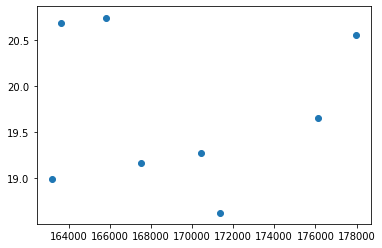

In [176]:
plt.scatter(X, y)

Weight coefficients:  [[2.29994644e-06]]
y-axis intercept:  [19.32138838]
Min X Value: [[163187]]
Max X Value: [[177982]]
True output: [18.99]
Predicted output: [19.69670974]
Prediction Error: [0.70670974]


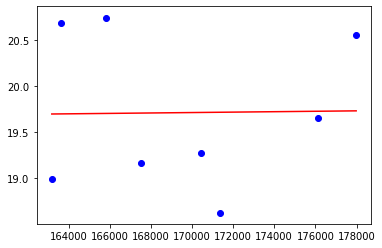

In [177]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

In [178]:
cons_df = pd.read_csv(basedir + "Sweden\Sweden_Electricty_Consumption.csv")

In [179]:
cons_df
sweden_cons = cons_df.T
sweden_cons.columns = sweden_cons.iloc[0]

In [180]:
sweden_cons = sweden_cons.reset_index().rename(columns={"index":"Year"}).drop([0])
sweden_cons

Unnamed: 0,Year,Total electricity consumption,Export,Crop and animal production- with consumption exceeding 20 000 kWh,Crop and animal production -with consumption up to 20 000 kWh,"Manufacturing industry, mining and quarrying","Electricity supply (offices, warehouses etc.)",Gas production; distribution of gaseous fuels through mains and pipeline networks,"Heating and cooling supply, Electricity supply (offices, warehouses etc.)","Heating and cooling supply, Gas supply (manuf./distr. of gas-works gas and natural gas)",...,Public administration and military defence,Education,Human health activities,Activities of membership organisations,"Creative, arts and entertainment activities",-one- or two family houses with consumption exceeding 10 000 kWh,-one- or two family houses with consumption up to 10 000 kWh,"-multi family houses, direct delivery, with consumption exceeding 5 000 kWh","-multi family houses, direct delivery, with consumtion up to 5 000 kWh",Second homes
1,2008,158716,14716,1644,1004,56625,113,76,1906,1721,...,1077,2590,3353,1054,1516,20024,5144,1131,4347,2320
2,2009,146971,9085,2072,973,50657,131,131,1983,1634,...,1004,2548,2789,855,1974,20363,4498,1396,4203,2998
3,2010,159844,12853,2289,895,53359,165,93,2007,1603,...,1147,2579,2939,1141,1818,23080,4700,1461,4276,3263
4,2011,160009,19714,1996,997,53843,208,90,2063,1333,...,1407,2367,2689,823,1402,19529,4789,1737,4321,2749
5,2012,174124,31254,2184,966,52981,197,123,2094,1793,...,1479,2290,2590,857,1427,20719,4919,1598,4219,3043
6,2013,161872,22676,2143,966,50935,205,110,2001,1459,...,1438,2173,2637,793,1419,20357,4805,1584,4180,2964
7,2014,163808,29475,2029,969,49552,162,118,1940,1804,...,1416,2088,2532,743,1376,18931,4805,1363,4193,2851
8,2015,168230,31894,2170,979,48784,214,129,1910,1474,...,1390,2151,2534,816,1373,19975,4722,1385,4210,3047
9,2016,166786,26022,2215,1012,49506,222,168,2088,1443,...,1451,2073,2606,793,1387,21210,4596,1436,4195,3212
10,2017,172377,30888,2028,832,49063,174,114,2172,1544,...,1611,2120,2634,906,1418,22563,4386,1098,4140,3040


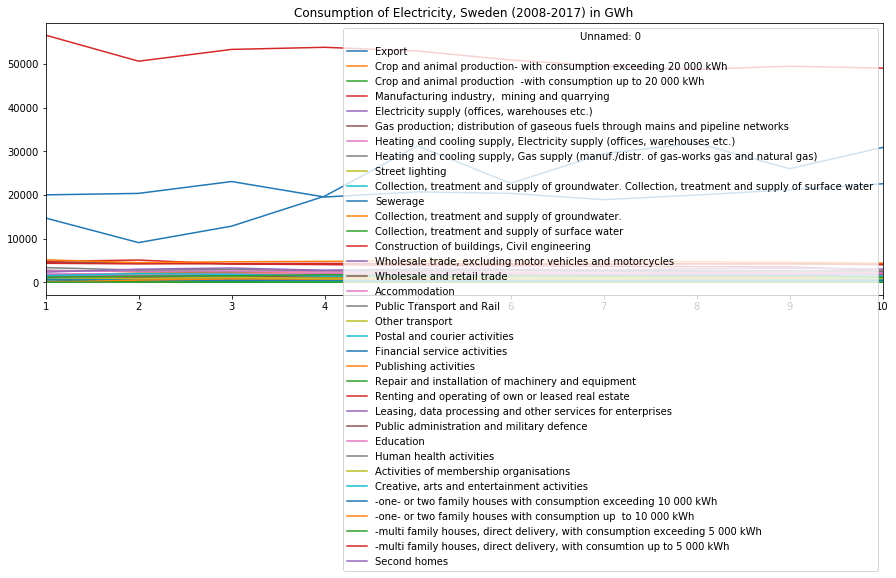

In [181]:
sweden_cons.drop("Total electricity consumption", axis=1).plot.line(figsize = [15,5], title = "Consumption of Electricity, Sweden (2008-2017) in GWh")
plt.show()